In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def cosine_scheduling(
    base_value: float, 
    final_value: float, 
    epochs: int, 
    iters_per_epoch: int,
    warmup_epochs: int = 0, 
    start_warmup_value: float = 0.0
    ):


    warm_up = np.array([])
    warm_up_iters = warmup_epochs * iters_per_epoch
    
    if warmup_epochs > 0:
        warm_up = np.linspace(start=start_warmup_value, stop=base_value, num=warm_up_iters)

    iters = np.arange(epochs * iters_per_epoch - warm_up_iters)
    cosine = final_value + 0.5 * (base_value - final_value) * (1 + np.cos((iters * np.pi) / len(iters)))

    schedule = np.concatenate((warm_up, cosine))

    return schedule


In [10]:
base_value = 0.0005 * 256/ 256
final_value = 1.0e-6
epochs = 100
iters_per_epoch = 1
warmup_epochs = 10

schedule = cosine_scheduling(base_value, final_value, epochs, iters_per_epoch, warmup_epochs)

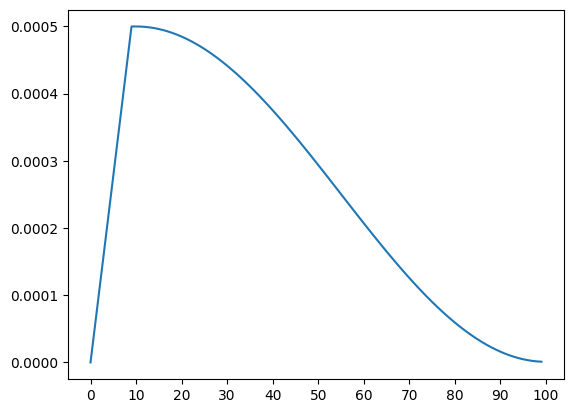

In [14]:
plt.plot(schedule)
plt.xticks([i for i in range(0, 101, 10)])
plt.show()